## Example: Thermosteric Sea Level Change

In [1]:
%matplotlib inline

import numpy as np
import xarray as xr
import glob
import momlevel
import matplotlib.pyplot as plt

In [2]:
# import dask amd start a client
from dask.distributed import Client, LocalCluster

In [3]:
# set up cluster and workers
cluster = LocalCluster(n_workers=4, 
                       threads_per_worker=2,
                       memory_limit='1.5GB')
client = Client(cluster)

In [4]:
# combine static file and time series into one xarray.Dataset
files = ["/Volumes/external/test_data/CM4.static.nc"] + glob.glob(
    "/Volumes/external/test_data/thermosteric_sl/*.nc"
)
ds = xr.open_mfdataset(files, use_cftime=True, chunks={"time": 1, "z_l": 7})
print(ds)

<xarray.Dataset>
Dimensions:       (bnds: 2, lev: 35, nv: 2, time: 60, vertex: 4, x: 1440, xh: 1440, xq: 1440, y: 1080, yh: 1080, yq: 1080, z_i: 36, z_l: 35)
Coordinates:
  * xh            (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * xq            (xq) float64 -299.6 -299.3 -299.1 -298.9 ... 59.66 59.91 60.16
  * yh            (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * yq            (yq) float64 -80.35 -80.27 -80.19 -80.11 ... 89.78 89.89 90.0
  * bnds          (bnds) float64 1.0 2.0
  * x             (x) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * y             (y) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95
  * lev           (lev) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
  * nv            (nv) float64 1.0 2.0
  * time          (time) object 0001-01-16 12:00:00 ... 0005-12-16 12:00:00
  * z_i           (z_i) float64 0.0 5.0 15.0 25.0 ... 5.75e+03 6.25e+03 6.75e+03
  * z_l           (z_l) float64 

### Calculate the thermosteric sea level change

In [5]:
result = momlevel.thermosteric(ds)

### Variables that are produced by the thermosteric() function

In [6]:
print(result)

<xarray.Dataset>
Dimensions:           (time: 60, xh: 1440, yh: 1080, z_l: 35)
Coordinates:
  * xh                (xh) float64 -299.7 -299.5 -299.2 ... 59.53 59.78 60.03
  * yh                (yh) float64 -80.39 -80.31 -80.23 ... 89.73 89.84 89.95
  * time              (time) object 0001-01-16 12:00:00 ... 0005-12-16 12:00:00
  * z_l               (z_l) float64 2.5 10.0 20.0 32.5 ... 5.5e+03 6e+03 6.5e+03
Data variables:
    reference_so      (z_l, yh, xh) float32 dask.array<chunksize=(7, 1080, 1440), meta=np.ndarray>
    reference_vol     (z_l, yh, xh) float32 dask.array<chunksize=(7, 1080, 1440), meta=np.ndarray>
    reference_rho     (z_l, yh, xh) float64 dask.array<chunksize=(7, 1080, 1440), meta=np.ndarray>
    reference_height  (z_l, yh, xh) float32 dask.array<chunksize=(7, 1080, 1440), meta=np.ndarray>
    expansion_coeff   (time, z_l, yh, xh) float64 dask.array<chunksize=(1, 7, 1080, 1440), meta=np.ndarray>
    thermosteric      (time, yh, xh) float64 dask.array<chunksize=(1, 1

### Visualize the thermosteric change over 5 years

In [7]:
year1 = result.thermosteric.isel(time=slice(0,12)).mean(dim="time")
year5 = result.thermosteric.isel(time=slice(48,60)).mean(dim="time")
difference = (year5-year1)
difference.load()
difference.persist()
print(difference)

<xarray.DataArray 'thermosteric' (yh: 1080, xh: 1440)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * xh       (xh) float64 -299.7 -299.5 -299.2 -299.0 ... 59.53 59.78 60.03
  * yh       (yh) float64 -80.39 -80.31 -80.23 -80.15 ... 89.73 89.84 89.95


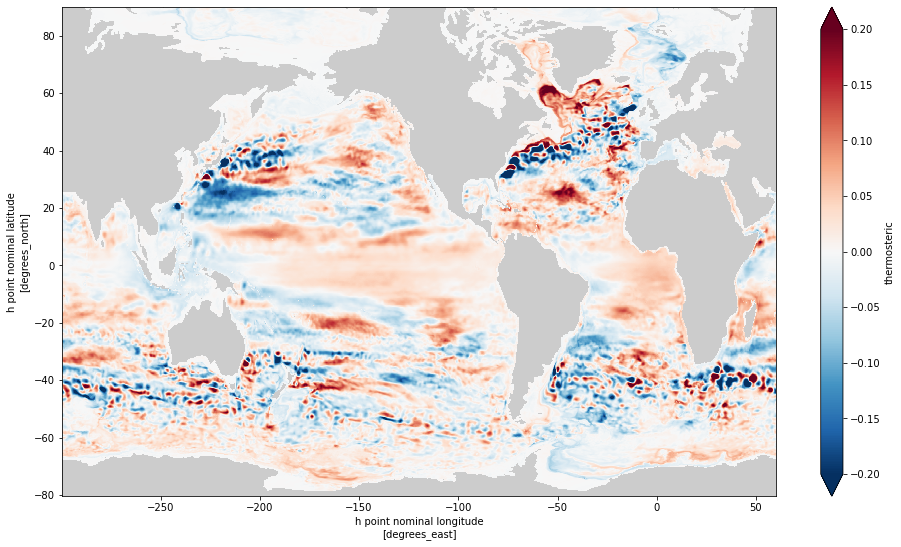

In [8]:
fig = plt.figure(figsize=(16,9))
ax = plt.subplot(1,1,1,facecolor="#cccccc")
difference.plot(vmin=-0.2,vmax=0.2,cmap="RdBu_r")

### Visualize the expansion coefficient in the Atlantic

In [9]:
expansion = result.expansion_coeff[-1]
expansion.load()
expansion.persist()
print(expansion)

<xarray.DataArray 'expansion_coeff' (z_l: 35, yh: 1080, xh: 1440)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, na

(4000.0, 0.0)

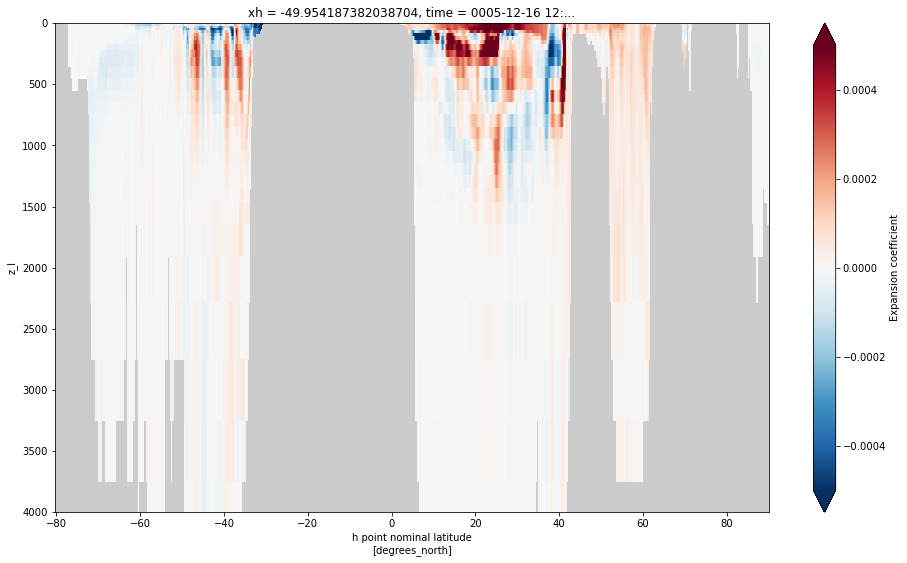

In [10]:
fig = plt.figure(figsize=(16,9))
ax = plt.subplot(1,1,1,facecolor="#cccccc")
expansion.sel(xh=-50,method="nearest").plot(vmin=-0.0005,vmax=0.0005,cmap="RdBu_r")
ax.invert_yaxis()
ax.set_ylim(4000,0)